#PREPARACION DE DATOS


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
df = response.json()
datos = pd.json_normalize(df, sep='_')

In [3]:
datos

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [5]:
datos.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [6]:
datos.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [7]:
for col in datos.columns:
    print(f"Columna: {col}")
    print(datos[col].unique())
    print("-" * 30)

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Columna: Churn
['No' 'Yes' '']
------------------------------
Columna: customer_gender
['Female' 'Male']
------------------------------
Columna: customer_SeniorCitizen
[0 1]
------------------------------
Columna: customer_Partner
['Yes' 'No']
------------------------------
Columna: customer_Dependents
['Yes' 'No']
------------------------------
Columna: customer_tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Columna: phone_PhoneService
['Yes' 'No']
------------------------------
Columna: phone_MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Columna: internet_InternetService
['DSL' 'Fiber optic' 'No']
-----------

In [8]:
datos['Churn'][datos['Churn'] == ""].count()

np.int64(224)

In [9]:
datos['Churn'].count()

np.int64(7267)

In [11]:
porcentaje_vacios = ( (datos['Churn'][datos['Churn'] == ""].count()) / datos['Churn'].count() ) * 100
print(f"{porcentaje_vacios:.2f}%")

3.08%


In [12]:

datos = datos[datos['Churn'] != ""]

In [13]:
datos['Churn'][datos['Churn'] == ""].count()

np.int64(0)

In [14]:
datos.columns = datos.columns.str.lower().str.replace(' ', '_')


In [15]:
datos['account_charges_total'][datos['account_charges_total'] == ' '].count()

np.int64(11)

In [16]:
porcentaje_vacios = ( (datos['account_charges_total'][datos['account_charges_total'] == ' '].count() ) / datos['account_charges_total'].count() ) * 100
print(f"{porcentaje_vacios:.2f}%")


0.16%


In [17]:
datos = datos[datos['account_charges_total'] != ' ']

In [18]:
datos['account_charges_total'] = datos['account_charges_total'].astype(float)

In [19]:

datos.sample(15)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
3725,5135-GRQJV,No,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,114.50,8331.95
1579,2249-YPRNG,Yes,Female,0,Yes,Yes,20,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.85,2239.65
3457,4795-UXVCJ,No,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30
6047,8257-RZAHR,Yes,Female,0,Yes,No,14,Yes,Yes,DSL,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),64.70,941.00
2717,3763-GCZHZ,Yes,Male,0,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Electronic check,104.05,6890.00
773,1095-WGNGG,No,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),101.05,5971.25
5212,7114-AEOZE,No,Female,0,No,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1128.10
1248,1784-EZDKJ,No,Male,0,Yes,No,51,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),106.80,5498.80
1953,2773-OVBPK,No,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.30,7567.20
915,1293-HHSHJ,No,Female,0,No,No,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,21.10,741.00


In [22]:
datos['Cuenta_Diaria'] = (datos['account_charges_monthly'] / 30).round(2)

In [23]:
datos.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias,Cuenta_Diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80,2.80


In [24]:
columnas_transforma = ['churn', 'customer_partner', 'customer_dependents', 'phone_phoneservice', 'phone_multiplelines', 'internet_onlinesecurity', 'internet_onlinebackup',
                         'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies', 'account_paperlessbilling']


In [25]:
datos[columnas_transforma] = datos[columnas_transforma].apply(lambda col: col.str.strip().str.lower().map({"yes": True, "no": False}))


In [26]:
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias,Cuenta_Diaria
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.60,593.30,2.19,2.19
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,2.00,2.00
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.46,2.46
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.27,3.27
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,2.80,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,0,False,False,13,True,False,DSL,True,False,False,True,False,False,One year,False,Mailed check,55.15,742.90,1.84,1.84
7263,9992-RRAMN,True,Male,0,True,False,22,True,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,2.84,2.84
7264,9992-UJOEL,False,Male,0,False,False,2,True,False,DSL,False,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.68,1.68
7265,9993-LHIEB,False,Male,0,True,True,67,True,False,DSL,True,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.26,2.26


In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   bool   
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   bool   
 5   customer_dependents        7032 non-null   bool   
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   bool   
 8   phone_multiplelines        6352 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    5512 non-null   object 
 11  internet_onlinebackup      5512 non-null   object 
 12  internet_deviceprotection  5512 non-null   object 
 13  internet_techsupport       5512 non-null   object 
 1

In [28]:
datos.describe()

,customer_seniorcitizen,customer_tenure,account_charges_monthly,account_charges_total,Cuentas_Diarias,Cuenta_Diaria
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159891,2.159891
std,0.368844,24.545260,30.085974,2266.771362,1.002955,1.002955
min,0.000000,1.000000,18.250000,18.800000,0.610000,0.610000
25%,0.000000,9.000000,35.587500,401.450000,1.187500,1.187500
50%,0.000000,29.000000,70.350000,1397.475000,2.340000,2.340000
75%,0.000000,55.000000,89.862500,3794.737500,2.992500,2.992500
max,1.000000,72.000000,118.750000,8684.800000,3.960000,3.960000


In [29]:
colores= ["#8547D7", "#D74799"]

In [31]:
conteo = datos['churn'].value_counts()
conteo

,count
churn,
False,5163
True,1869


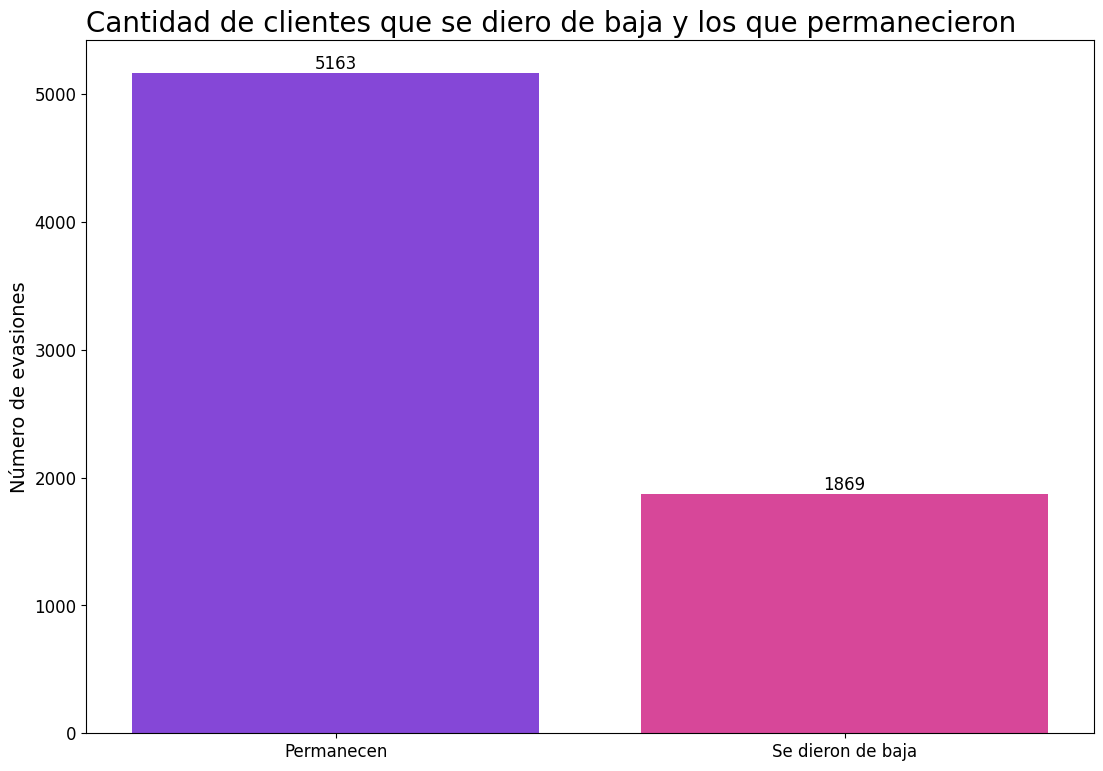

In [32]:
plt.style.use('default')
conteo = datos['churn'].value_counts()
etiquetas = ['Permanecen', 'Se dieron de baja']
valores = conteo.get(False, 0), conteo.get(True, 0)
fig, ax = plt.subplots(figsize=(13,9))
ax.bar(etiquetas, valores, color=colores)
ax.set_title('Cantidad de clientes que se diero de baja y los que permanecieron', loc='left', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Número de evasiones', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
for i, valor in enumerate(valores):
    ax.text(i, valor + 5, str(valor), ha='center', va='bottom', fontsize=12)

plt.show()

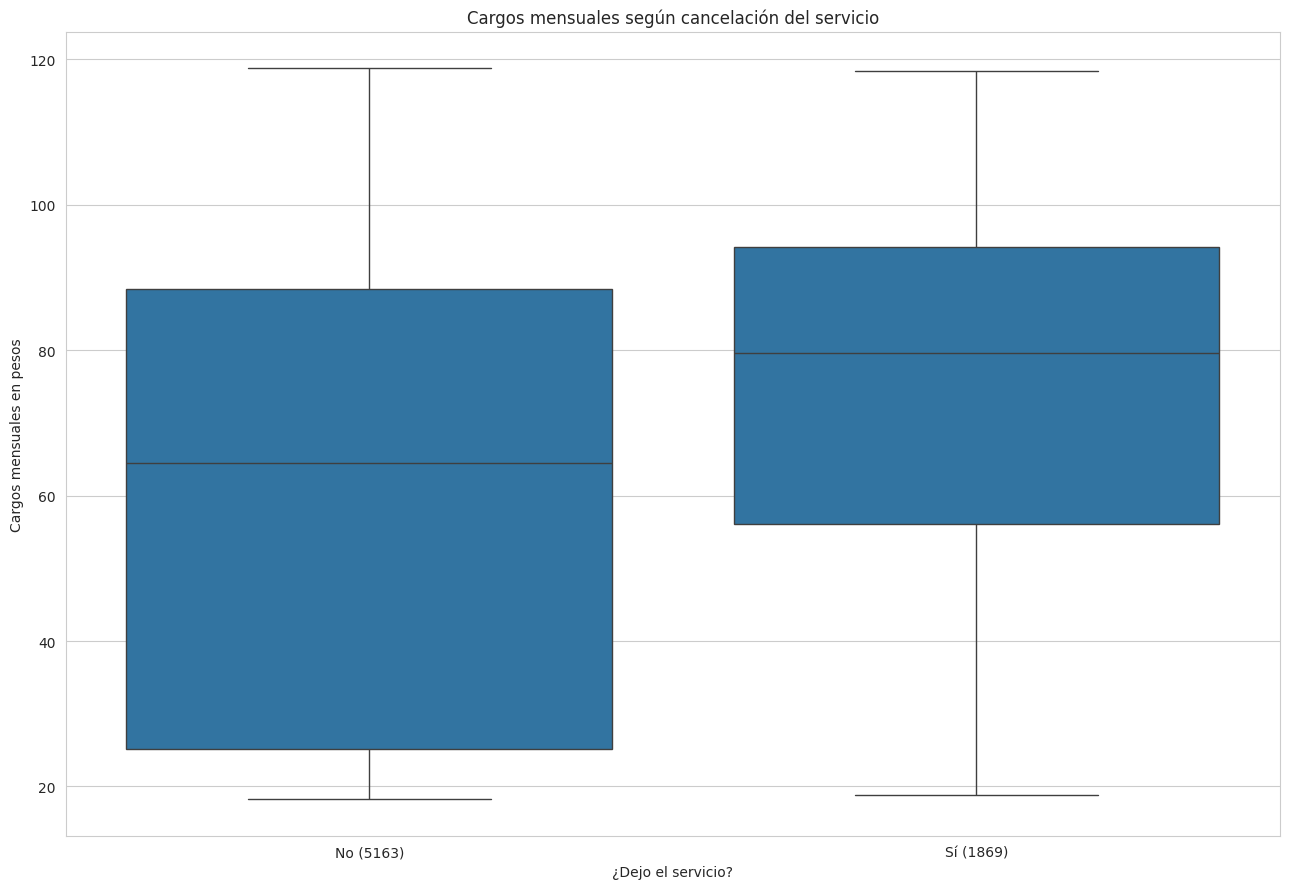

In [34]:
plt.figure(figsize=(13,9))
sns.set_style("whitegrid")

conteo = datos['churn'].value_counts()
etiquetas = [f"No ({conteo[False]})", f"Sí ({conteo[True]})"]

sns.boxplot(data=datos, x='churn', y='account_charges_monthly')

plt.title('Cargos mensuales según cancelación del servicio')
plt.xlabel('¿Dejo el servicio?')
plt.ylabel('Cargos mensuales en pesos')
plt.xticks([0, 1], etiquetas)
plt.tight_layout()

plt.show()

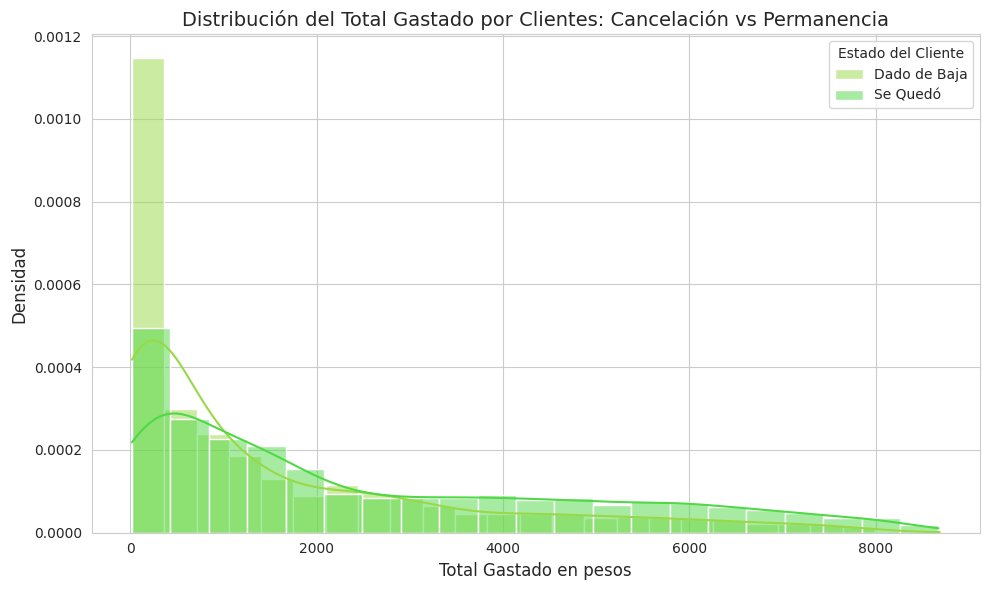

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(
    datos[datos['churn'] == True]['account_charges_total'],
    color="#99D846",
    label='Dado de Baja',
    kde=True,
    stat='density',
    alpha=0.5,
    common_norm=False
)
sns.histplot(
    datos[datos['churn'] == False]['account_charges_total'],
    color="#50D846",
    label='Se Quedó',
    kde=True,
    stat='density',
    alpha=0.5,
    common_norm=False
)
plt.title("Distribución del Total Gastado por Clientes: Cancelación vs Permanencia", fontsize=14)
plt.xlabel("Total Gastado en pesos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Estado del Cliente")
plt.tight_layout()
plt.show()


In [36]:
datos.groupby('churn')['account_charges_monthly'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
False,5163.0,61.307408,31.094557,18.25,25.10,64.45,88.475,118.75
True,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.200,118.35


In [37]:
datos.groupby('churn')[['account_charges_monthly', 'account_charges_total', 'customer_tenure']].describe()

account_charges_monthly                                             \
                        count       mean        std    min    25%    50%   
churn                                                                      
False                  5163.0  61.307408  31.094557  18.25  25.10  64.45   
True                   1869.0  74.441332  24.666053  18.85  56.15  79.65   

                      account_charges_total                                   \
          75%     max                 count         mean          std    min   
churn                                                                          
False  88.475  118.75                5163.0  2555.344141  2329.456984  18.80   
True   94.200  118.35                1869.0  1531.796094  1890.822994  18.85   

                                           customer_tenure             \
           25%      50%       75%      max           count       mean   
churn                                                                   
False  577.825  1683.60  4264.125  8672.45          5163.0  37.650010   
True   134.500   703.55  2331.300  8684.80          1869.0  17.979133   

                                               
             std  min   25%   50%   75%   max  
churn                                          
False  24.076940  1.0  15.0  38.0  61.0  72.0  
True   19.531123  1.0   2.0  10.0  29.0  72.0

#Informe

Informe Final - Evasión de Clientes en Telecom X

Introducción
Este análisis utiliza datos de Telecom X, empresa ficticia con alta tasa de churn (cancelación de clientes). El objetivo fue identificar factores que influyen en la baja de servicios para apoyar al equipo de Data Science en la creación de modelos predictivos y estrategias de retención.

Limpieza y Datos
Los datos se obtuvieron en JSON y se procesaron con requests y pandas. Se normalizó la estructura, se convirtieron variables categóricas y numéricas, se eliminaron registros incompletos (<5%) y se verificó consistencia de tipos.

Análisis Exploratorio
Se usaron matplotlib y seaborn para explorar:

Churn: mayoría permaneció, aunque la cancelación sigue siendo significativa.

Cargos mensuales: clientes que cancelaron pagaban en promedio 74.44 vs 61.30 de quienes permanecen.

Cargos totales: clientes leales acumulan mayor gasto.

Antigüedad: quienes se fueron tenían 17.9 meses de servicio, los que permanecen 37.6.

Hallazgos Clave

Altos cargos mensuales aumentan la probabilidad de churn.

Clientes nuevos son los más vulnerables.

La fidelización se fortalece con el tiempo y mayores gastos acumulados.

Conclusiones y Recomendaciones
La evasión se relaciona con precios elevados y baja antigüedad. Se sugiere:

Descuentos a clientes nuevos con cargos altos.

Programas de fidelización temprana.

Encuestas para conocer causas de cancelación.

Revisión de política de precios para asegurar valor percibido.